Importamos las bibliotecas nesesarias 

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Para   entender mejor como están compuestos nuestros archivos realizamos una  exploración donde podremos comprender mejor su estructura ,datos faltantes y poder ver la cantidad de datos 

In [10]:
# Cargamos el Data Frame 
movies_data = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv')

print("Datos de 'movies_dataset_desanidado':")
print(movies_data.head())
print(movies_data.info())
print(movies_data.describe())
print(movies_data.shape)



Datos de 'movies_dataset_desanidado':
   id_pelicula     titulo nombre_genero idioma_original codigo_idioma_iso  \
0          862  Toy Story     Animation              en                en   
1          862  Toy Story        Comedy              en                en   
2          862  Toy Story        Family              en                en   
3         8844    Jumanji     Adventure              en                en   
4         8844    Jumanji     Adventure              en                fr   

  nombre_idioma nombre_compania_produccion               nombre_pais  \
0       English    Pixar Animation Studios  United States of America   
1       English    Pixar Animation Studios  United States of America   
2       English    Pixar Animation Studios  United States of America   
3       English           TriStar Pictures  United States of America   
4      Français           TriStar Pictures  United States of America   

   anio_estreno fecha_estreno  presupuesto   ingresos  retorno_inv

In [11]:
credits_data = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/credits_desanidado.csv')
print(credits_data.head())
print(credits_data.info())
print(credits_data.describe())
print(credits_data.shape)


   id_pelicula    nombre_actor       papel       director
0          862       Tom Hanks   Principal  John Lasseter
1          862       Tim Allen  Secundario  John Lasseter
2         8844  Robin Williams   Principal   Joe Johnston
3         8844   Jonathan Hyde  Secundario   Joe Johnston
4        15602  Walter Matthau   Principal  Howard Deutch
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85550 entries, 0 to 85549
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_pelicula   85550 non-null  int64 
 1   nombre_actor  85550 non-null  object
 2   papel         85550 non-null  object
 3   director      84891 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.6+ MB
None
         id_pelicula
count   85550.000000
mean    93255.255535
std    101564.532269
min         2.000000
25%     23019.250000
50%     51544.000000
75%    123056.000000
max    469172.000000
(85550, 4)


Obserbamos que en este caso, dado que ambos archivos ( movies_dataset_desanidado.csv y credits_desanidado.csv) comparten la columna id_pelicula podemos hacer una union. Eliminamos columnas que consideramos que poseen información repetida que puede generar errores a futuro .La columna retorno_inversion no me parece que sea la mas adecuada para representar la cantidad de ganancias o perdidas es por ello que la cambio por porsentage_ganancias donde se representa el porcentaje de ganancias .

In [53]:
# Cargamos los datos
movies_data = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/movies_dataset_desanidado.csv')
credits_data = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/credits_desanidado.csv')

# Realizamos el join utilizando la columna en común 'id_pelicula'
data_peliculas = pd.merge(movies_data, credits_data, on='id_pelicula', how='inner') 

# Agregamos la columna 'porcentage_ganancias' calculando el porcentaje de retorno de ingresos, limitado a 2 decimales
data_peliculas['porcentage_ganancias'] = data_peliculas.apply(
    lambda row: round((row['ingresos'] / row['presupuesto'] * 100), 2) if row['presupuesto'] > 0 else 0,
    axis=1
)

# Eliminamos la columna retorno_inversion
if 'retorno_inversion' in data_peliculas.columns:
    data_peliculas = data_peliculas.drop(columns=['retorno_inversion'])

# Eliminamos otras columnas innecesarias
columns_to_drop = ['idioma_original', 'nombre_idioma', 'anio_estreno', 'cantidad_votos']
existing_columns = [col for col in columns_to_drop if col in data_peliculas.columns]
data_peliculas = data_peliculas.drop(columns=existing_columns)

# Verificamos las columnas después de la eliminación
print("\nColumnas después de eliminar las innecesarias:\n", data_peliculas.columns)

# Guardamos el resultado en un nuevo archivo CSV
output_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas.csv'
data_peliculas.to_csv(output_path, index=False)
print("\nArchivo guardado en:", output_path)




Columnas después de eliminar las innecesarias:
 Index(['id_pelicula', 'titulo', 'nombre_genero', 'codigo_idioma_iso',
       'nombre_compania_produccion', 'nombre_pais', 'fecha_estreno',
       'presupuesto', 'ingresos', 'popularidad', 'promedio_votos',
       'nombre_actor', 'papel', 'director', 'porcentage_ganancias'],
      dtype='object')

Archivo guardado en: C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas.csv


Después  de realizar la unión volvemos a hacer un análisis del nuevo archivo para detectar posibles datos faltantes 

In [54]:
# Cargamos los datos
data_peliculas = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas.csv')

# Inspección inicial para ver la comstitución y nombres de columnas
print(data_peliculas.head())
print(data_peliculas.info())
print(data_peliculas.describe())
print(f"Dimensiones del dataframe: {data_peliculas.shape}")

# Análisis de valores nulos
print("Valores nulos por columna")
print(data_peliculas.isnull().sum())

# Porcentaje de valores faltantes
missing_values = data_peliculas.isnull().mean() * 100
print("Porcentaje de valores faltantes por columna:\n", missing_values)

# Contar el número de filas duplicadas
num_duplicates = data_peliculas.duplicated(keep=False).sum()
print("Número total de filas duplicadas:", num_duplicates)



   id_pelicula     titulo nombre_genero codigo_idioma_iso  \
0          862  Toy Story     Animation                en   
1          862  Toy Story     Animation                en   
2          862  Toy Story        Comedy                en   
3          862  Toy Story        Comedy                en   
4          862  Toy Story        Family                en   

  nombre_compania_produccion               nombre_pais fecha_estreno  \
0    Pixar Animation Studios  United States of America    1995-10-30   
1    Pixar Animation Studios  United States of America    1995-10-30   
2    Pixar Animation Studios  United States of America    1995-10-30   
3    Pixar Animation Studios  United States of America    1995-10-30   
4    Pixar Animation Studios  United States of America    1995-10-30   

   presupuesto   ingresos  popularidad  promedio_votos nombre_actor  \
0     30000000  373554033        21.95             7.7    Tom Hanks   
1     30000000  373554033        21.95             7.7    

Se detecta filas duplicadas las eliminamos ,además en las colunas presupuesto, ingresos, retorno_inversion, popularidad', promedio_votos se detecta datos com valor cero al considerar que pueden producir outliers o en el caso de popularidad representa un nulo interés preferimos borrarlos para evitar errores a futuro ,  tambien se borra valores negativos.
En la columna presupuesto podemos ver que hay datos desde un dólar investigamos en línea y nos damos cuenta que son falsos ,además que la recolección de información no se hacia hasta antes de 1930 para evitar outliers al momento de calcular el porcentaje de ganancias prefiero borrar los datos con presupuestos menores a mil dólares

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargamos el Data Frame
data_peliculas = pd.read_csv('C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas.csv')

# Seleccionamos las columnas a normalizar
columnas_a_normalizar = ['popularidad', 'promedio_votos']

# Aplicamos la normalización usando MinMaxScaler
scaler = MinMaxScaler()
data_peliculas[columnas_a_normalizar] = scaler.fit_transform(data_peliculas[columnas_a_normalizar])

# Eliminamos filas duplicadas basándonos en `id_pelicula`, manteniendo una sola fila por película
# Calculamos la media de `popularidad` y `promedio_votos` para cada `id_pelicula`
data_peliculas = data_peliculas.groupby(['id_pelicula', 'titulo'], as_index=False).agg({
    'popularidad': 'mean',
    'promedio_votos': 'mean',
    # Incluye otras columnas relevantes si es necesario, eligiendo el método apropiado
})

# Guardar el DataFrame limpio en un nuevo archivo CSV
output_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas_limpio.csv'
data_peliculas.to_csv(output_path, index=False)
print("\nArchivo limpio guardado en:", output_path)




Archivo limpio guardado en: C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas_limpio.csv


normalisamos las colunas

In [62]:
import pandas as pd

# Cargar el archivo de origen
input_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas.csv'
df = pd.read_csv(input_path)

# 1. Reemplazar valores nulos en 'nombre_genero' si existe
if 'nombre_genero' in df.columns:
    df['nombre_genero'] = df['nombre_genero'].fillna('Desconocido')

# 2. Eliminar duplicados basados en columnas clave
columnas_clave = [
    'id_pelicula', 'titulo', 'codigo_idioma_iso', 'nombre_compania_produccion',
    'nombre_pais', 'fecha_estreno', 'presupuesto', 'ingresos', 'popularidad',
    'promedio_votos', 'director', 'porcentage_ganancias'
]
df = df.drop_duplicates(subset=columnas_clave)

# 3. Aplicar one-hot encoding a la columna 'nombre_genero' si existe
if 'nombre_genero' in df.columns:
    df = pd.get_dummies(df, columns=['nombre_genero'])

    # Convertir las columnas de género a valores 0 y 1 (entero)
    genero_columns = [col for col in df.columns if col.startswith('nombre_genero_')]
    df[genero_columns] = df[genero_columns].astype(int)

    # Renombrar las columnas de one-hot encoding para quitar el prefijo 'nombre_genero_'
    df.rename(columns=lambda x: x.replace('nombre_genero_', '') if x.startswith('nombre_genero_') else x, inplace=True)
else:
    print("La columna 'nombre_genero' no existe en el archivo.")
    genero_columns = []  # Si no existe 'nombre_genero', no habrá columnas de géneros

# Obtener los nombres de las columnas de género actualizados
genero_columns = [col for col in df.columns if col in {'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                                                      'Desconocido', 'Documentary', 'Drama', 'Family', 'Fantasy', 
                                                      'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 
                                                      'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'}]

# Confirmación de columnas de género después de renombrarlas
print("Columnas después del renombramiento de géneros:")
print(genero_columns)

# 4. Agrupar los datos por `id_pelicula` y `titulo` para consolidar una fila por película, incluyendo los géneros
agg_dict = {
    'popularidad': 'mean',
    'promedio_votos': 'mean',
    'presupuesto': 'first',
    'ingresos': 'first',
    'codigo_idioma_iso': 'first',
    'nombre_compania_produccion': 'first',
    'nombre_pais': 'first',
    'fecha_estreno': 'first',
    'director': 'first',
    'porcentage_ganancias': 'mean'
}
# Añadir los géneros al diccionario de agregación para mantener el valor máximo (1 si existe en alguna fila)
agg_dict.update({col: 'max' for col in genero_columns})

# Agrupar los datos
data_peliculas_unicos = df.groupby(['id_pelicula', 'titulo'], as_index=False).agg(agg_dict)

# Mostrar una muestra del DataFrame con agrupamiento aplicado para verificar los géneros
print("DataFrame agrupado y procesado (muestra):")
print(data_peliculas_unicos.head())

# Guardar el DataFrame procesado en un nuevo archivo CSV
output_path = 'C:/Users/jrgsi/OneDrive/Escritorio/PROUECTOS HENRY/SISTEMA DE RECOMENDACION PELICULAS/datos/data_peliculas.csv'
data_peliculas_unicos.to_csv(output_path, index=False)
print("\nArchivo agrupado guardado en:", output_path)





Columnas después del renombramiento de géneros:
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Desconocido', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
DataFrame agrupado y procesado (muestra):
   id_pelicula           titulo  popularidad  promedio_votos  presupuesto  \
0            5       Four Rooms         9.03             6.5      4000000   
1           11        Star Wars        42.15             8.1     11000000   
2           12     Finding Nemo        25.50             7.6     94000000   
3           13     Forrest Gump        48.31             8.2     55000000   
4           14  American Beauty        20.73             7.9     15000000   

    ingresos codigo_idioma_iso nombre_compania_produccion  \
0    4300000                en              Miramax Films   
1  775398007                en                  Lucasfilm   
2  940335536            

Gráfico de líneas .-Examinamos la tendencia de los ingresos a lo largo de los años. Esto puede mostrar cómo ha cambiado la industria del cine en términos de ingresos generados por año

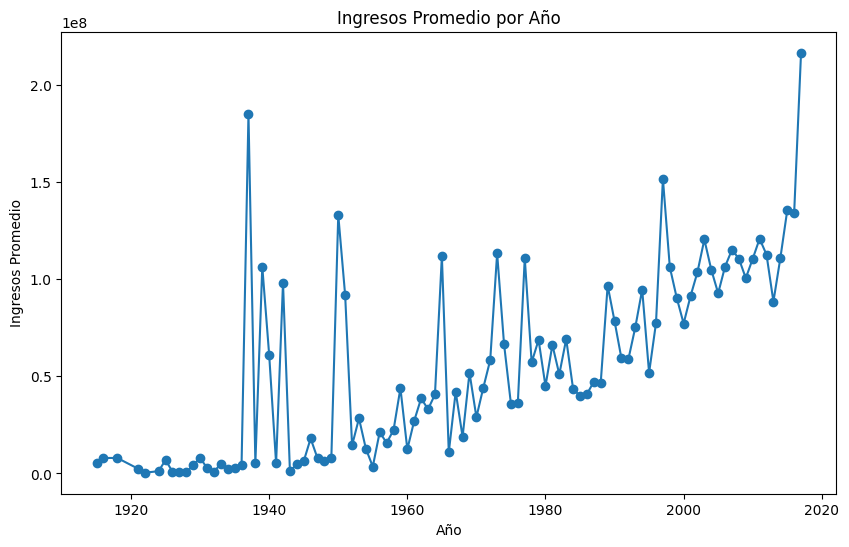

In [57]:
df['año'] = pd.to_datetime(df['fecha_estreno']).dt.year
ingresos_por_año = df.groupby('año')['ingresos'].mean()

plt.figure(figsize=(10, 6))
plt.plot(ingresos_por_año.index, ingresos_por_año.values, marker='o')
plt.title('Ingresos Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos Promedio')
plt.show()


 Comparamos mediante un grafico de barras  la popularidad y el porcentaje de ganancias por país para identificar qué países producen las películas más exitosas y populares.

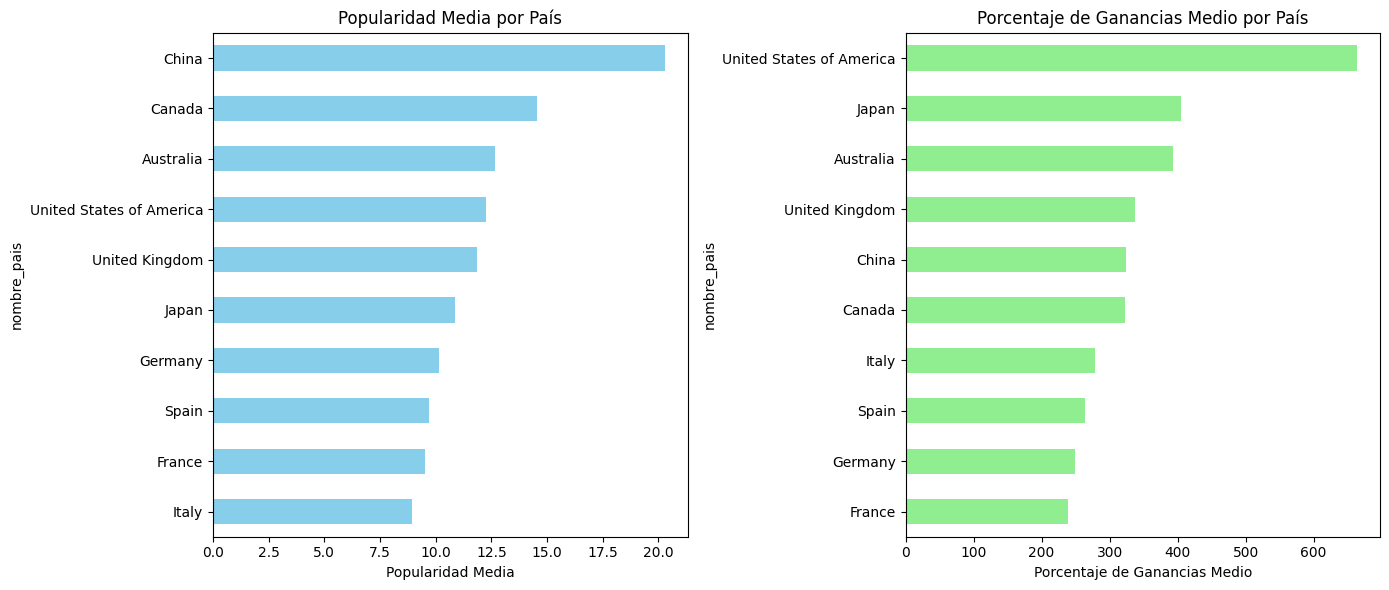

In [18]:
top_paises = df['nombre_pais'].value_counts().nlargest(10).index
popularidad_pais = df[df['nombre_pais'].isin(top_paises)].groupby('nombre_pais')['popularidad'].mean()
ganancias_pais = df[df['nombre_pais'].isin(top_paises)].groupby('nombre_pais')['porcentage_ganancias'].mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
popularidad_pais.sort_values().plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('Popularidad Media por País')
ax[0].set_xlabel('Popularidad Media')

ganancias_pais.sort_values().plot(kind='barh', ax=ax[1], color='lightgreen')
ax[1].set_title('Porcentaje de Ganancias Medio por País')
ax[1].set_xlabel('Porcentaje de Ganancias Medio')

plt.tight_layout()
plt.show()


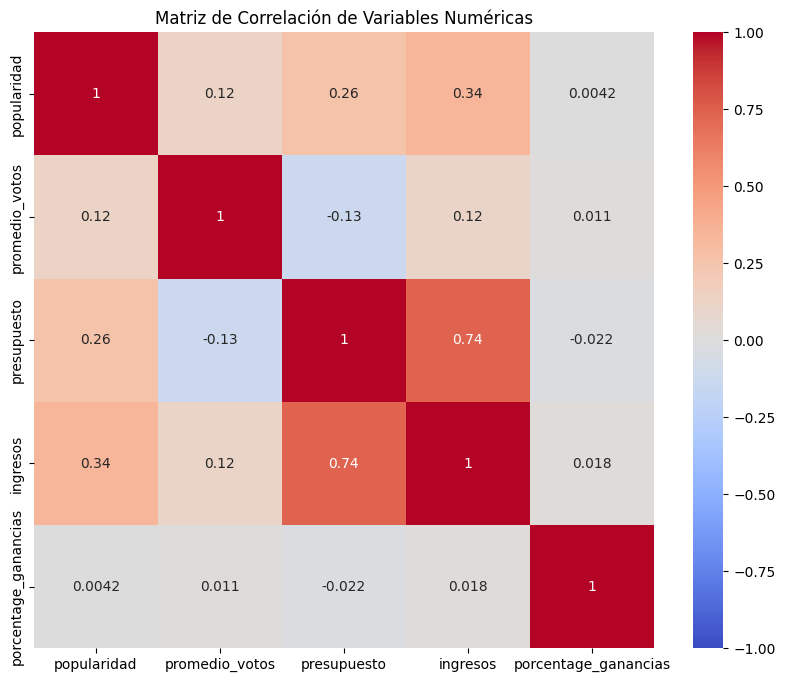

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas relevantes para la correlación
columnas_numericas = ['popularidad', 'promedio_votos', 'presupuesto', 'ingresos', 'porcentage_ganancias']
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
correlacion = df_numerico.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


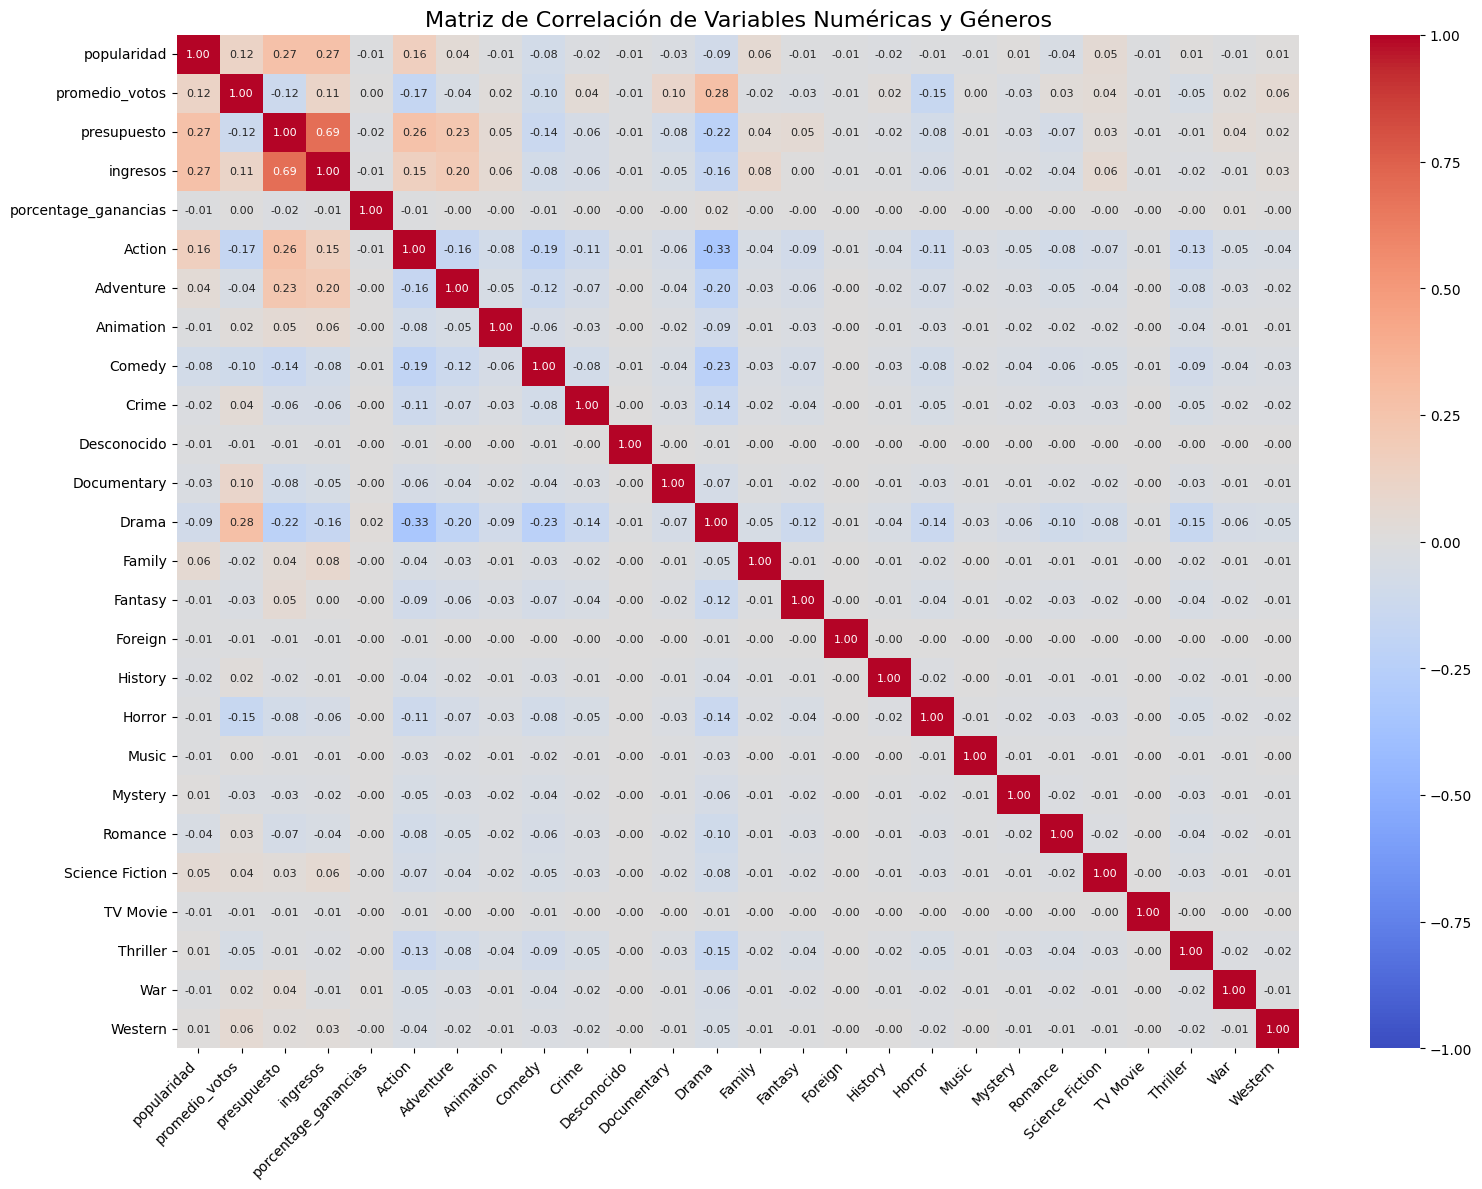

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas relevantes y columnas de géneros
columnas_numericas = ['popularidad', 'promedio_votos', 'presupuesto', 'ingresos', 'porcentage_ganancias']

# Listar explícitamente los nombres de las columnas de género que buscas en el DataFrame
generos = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Desconocido', 'Documentary', 'Drama', 
           'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 
           'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

# Filtrar las columnas de género en el DataFrame
columnas_genero = [col for col in df.columns if col in generos]

# Combinar las columnas numéricas y las columnas de género
columnas_para_correlacion = columnas_numericas + columnas_genero

# Crear un DataFrame solo con las columnas seleccionadas
df_correlacion = df[columnas_para_correlacion]

# Calcular la matriz de correlación
correlacion = df_correlacion.corr().round(2)  # Redondear a 2 decimales

# Graficar la matriz de correlación con ajustes
plt.figure(figsize=(16, 12))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8}, fmt=".2f")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustar tamaño y orientación de etiquetas en eje x
plt.yticks(fontsize=10)  # Ajustar tamaño de etiquetas en eje y
plt.title('Matriz de Correlación de Variables Numéricas y Géneros', fontsize=16)
plt.tight_layout()  # Mejorar la disposición para que no se solapen
plt.show()

